In [38]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 

reading data

In [39]:
df = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\BNB Price Prediction\archive\AB_US_2023.csv')

Understanding the dataset 

In [61]:
# Understanding the dataset 

print(df.shape) # No of rows and columns

df.head() # First 5 rows of the dataset
#df.tail() # Last 5 rows of the dataset


(232147, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [41]:
# info about the dataset 
df.info()  # datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [42]:
# Describe statistics on a dataset 
# Only works in numerical data 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [43]:
# Number of columns in the dataset 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [44]:
df.duplicated() # Duplicated rows 

0         False
1         False
2         False
3         False
4         False
          ...  
232142    False
232143    False
232144    False
232145    False
232146    False
Length: 232147, dtype: bool

In [59]:
# Check for number of unique values in descending order 
df.nunique().sort_values(ascending=False)

id                                232146
name                              220164
longitude                         159988
latitude                          157966
host_id                           119582
host_name                          29368
last_review                         3147
price                               2429
neighbourhood                       1412
reviews_per_month                   1367
number_of_reviews                    861
availability_365                     366
number_of_reviews_ltm                271
minimum_nights                       178
calculated_host_listings_count       149
neighbourhood_group                   30
city                                  27
room_type                              4
dtype: int64

Cleaning data 

In [63]:
# Checking for null values in descending order 
df.isna().sum().sort_values(ascending=False)  #also .isnull()

neighbourhood_group               135647
reviews_per_month                  49085
last_review                        49085
name                                  16
host_name                             13
id                                     0
number_of_reviews                      0
number_of_reviews_ltm                  0
availability_365                       0
calculated_host_listings_count         0
price                                  0
minimum_nights                         0
room_type                              0
longitude                              0
latitude                               0
neighbourhood                          0
host_id                                0
city                                   0
dtype: int64

In [64]:
df = df.drop('neighbourhood_group', axis=1,) # drop this column since it has many null values 

In [71]:
print(df['name'].mode())
df['name'].fillna(df['name'].mode()) #Fill null values using mode for few null values

0    Presidential Suite In A Mansion
Name: name, dtype: object


0                     Bright, Modern Garden Unit - 1BR/1BTH
1                                        Creative Sanctuary
2         Friendly Room Apt. Style -UCSF/USF - San Franc...
3                           Historic Alamo Square Victorian
4                       Mission Sunshine, with Private Bath
                                ...                        
232142    Private Half Moon Bay Oasis By Pillar Point Be...
232143                                        Home near SFO
232144                     Modern New Private Studio in SFO
232145              Lux Bedroom with a Shared Bath near SFO
232146               Lux Bedroom with Private Bath near SFO
Name: name, Length: 232147, dtype: object

In [72]:
print(df['host_name'].mode())
df['host_name'].fillna(df['host_name'].mode())

0    Blueground
Name: host_name, dtype: object


0                    Holly
1         Philip And Tania
2                    Aaron
3                     Rosy
4             Ivan & Wendy
                ...       
232142              Khalid
232143           Christina
232144              Vality
232145          Stephannie
232146          Stephannie
Name: host_name, Length: 232147, dtype: object

In [56]:
# df['price'].value_counts() \
#  .head(20) \
#  .plot(kind='bar', title='Frequency of the first 20 mode price')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

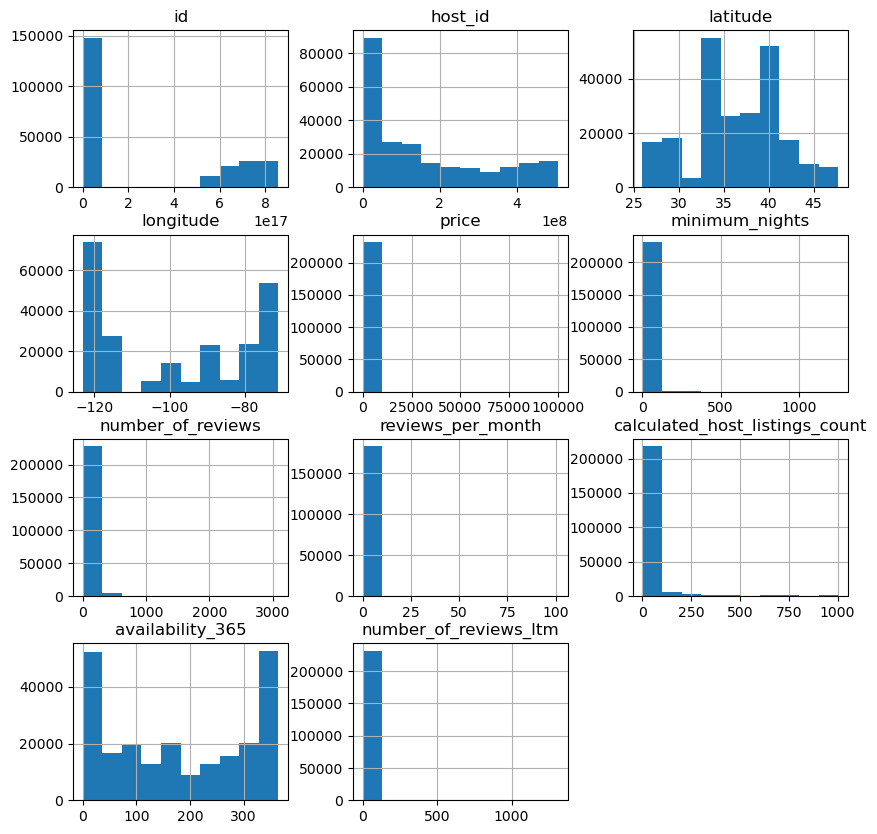

Relationship matrix

In [ ]:
correlation = df.corr()

<Axes: >

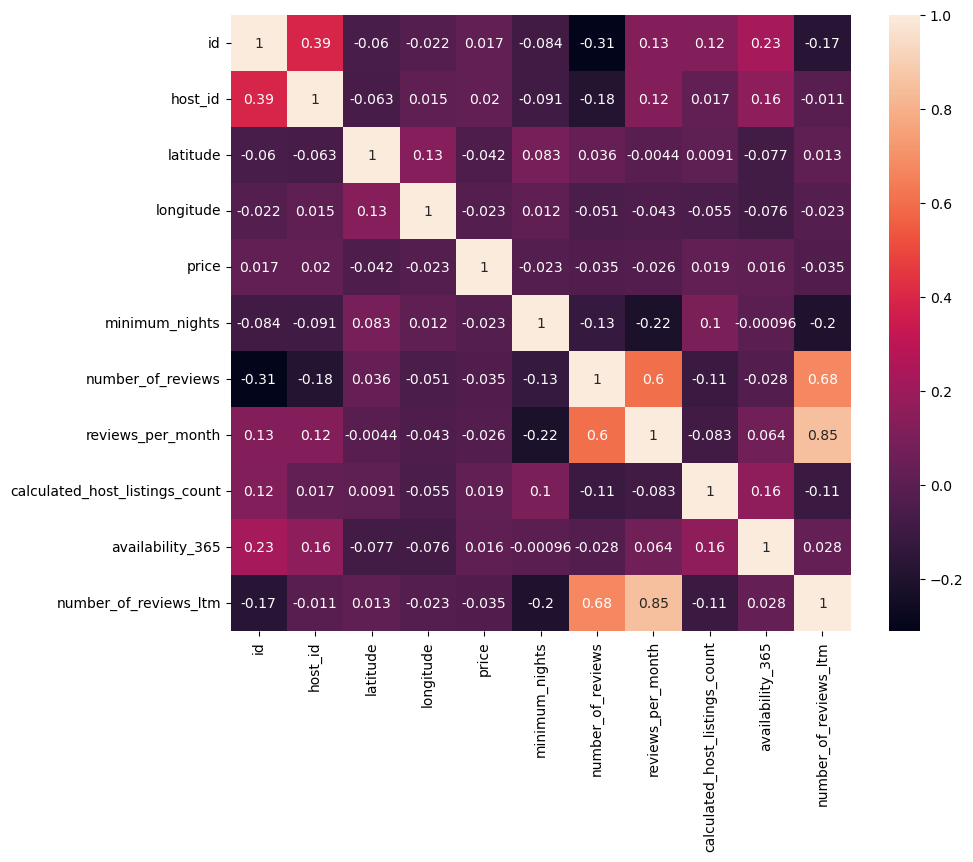

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, )